<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Расчет-MAE-между-расчётами-и-значением-признака-от-заказчика" data-toc-modified-id="Расчет-MAE-между-расчётами-и-значением-признака-от-заказчика-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет MAE между расчётами и значением признака от заказчика</a></span></li><li><span><a href="#Анализ-признаков,-недоступные-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Анализ-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Анализ-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import mannwhitneyu,ttest_ind, ttest_rel 

import warnings
warnings.filterwarnings("ignore")


In [2]:
RND = 12345

### Первичный анализ данных 

In [3]:
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')   # обучающая выборка
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')     # тестовая выборка
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')     # исходные данные

In [4]:
df_full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13237,2017-10-11 17:59:59,4.196164,12.074998,6.573477,44.921836,72.623453,6.055701,2.944820,11.881701,2.068012,...,17.989850,-499.963035,16.063848,-399.925337,12.988779,-500.013626,10.031861,-500.176452,14.017699,-500.154125
4043,2016-08-03 04:59:59,4.654358,11.912130,7.103392,42.204185,57.728017,8.154362,2.540402,6.851434,3.527783,...,19.977343,-399.514374,9.943043,-401.099299,10.027919,-394.763793,4.997538,-399.976505,23.000198,-500.430253
15778,2018-02-19 10:59:59,6.443679,9.550411,9.264323,43.685748,83.816877,10.255740,0.779777,13.181426,1.522114,...,19.973306,-501.406031,14.957580,-499.983096,10.991668,-500.170351,8.994964,-500.081739,11.007796,-499.692950
7350,2017-01-03 00:59:59,5.855149,7.018573,14.109740,46.745762,69.458248,9.528642,1.528037,11.601081,2.461713,...,17.010152,-496.798730,15.005605,-465.364159,17.619010,-500.599774,7.998565,-500.172074,19.977036,-601.395925
9476,2017-04-15 05:59:59,5.543878,12.091716,9.911428,42.061957,70.543109,8.063335,2.927677,12.075297,2.532524,...,25.008840,-402.170084,23.049955,-399.869150,25.986872,-450.242251,23.996018,-449.772867,29.998381,-500.238671


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [6]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

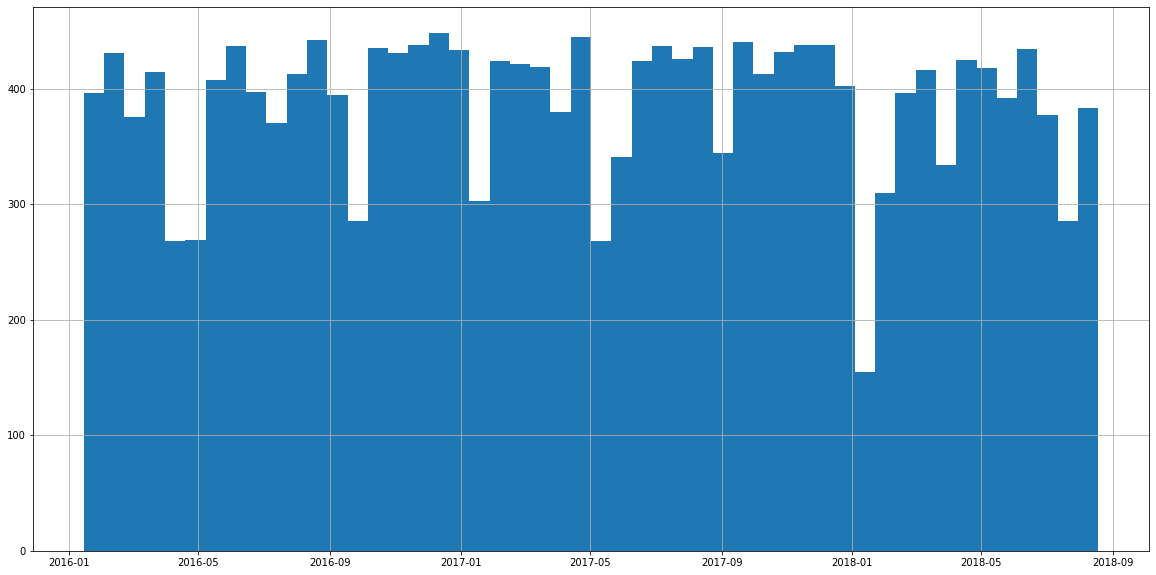

In [7]:
df_full['date'].hist(figsize = (20,10), bins = 50)

In [8]:
df_full.isna().sum().sort_values(ascending = False).head(20)*100/len(df_full)

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
final.output.concentrate_sol                1.085447
rougher.input.feed_size                     0.745923
primary_cleaner.output.concentrate_pb       0.596739
primary_cleaner.input.xanthate              0.535007
final.output.tail_pb                        0.519574
rougher.input.feed_pb                       0.514430
rougher.input.feed_sol                      0.509285
primary_cleaner.output.tail_sol             0.318946
rougher.input.floatbank11_sulfate           0.226349
primary_cleaner.input.depressant            0.190339
rougher.input.floatbank10_sulfate           0.174906
primary_cleaner.input.sulfate               0.123463
secondary_cleaner.state.floatbank2_b_air    0.118319
rougher.output.concentrate_sol              0.

In [9]:
100*df_full.dropna().shape[0]/df_full.shape[0]

82.79232470806112

In [10]:
df_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

В данных можно выделить несколько блоков: 
- дата записи;
- данные по флотации;
- данные по первичной очистке;
- данные по вторичной очистке;
- данные по фильнальной очистке.
В каждом из перечисленных блоков можно выделить следующие данные:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики.
Кроме данных по основному продукту - золоту, также приводятся данные до серебру и свинцу. Но из представленных данных непонятно, происходит ли получение других продуктов кроме золота. 
В данных содержится достаточно много пропусков: если удалить все пропуски, то мы потеряем около 17 % данных. С учетом что выборка достаточно большая, возможно, удаление строк с пропусками рациональный путь решения задачи

### Расчет MAE между расчётами и значением признака от заказчика

In [11]:
def eff_rec(row):
    '''
    Функция для расчета эффективности обогащения
    На вход функция получает всю строку, но использует только следующие данные: 
    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.
    На выходе функция расчитывает  эффективности обогащения руды в процентах
    '''
    F = row['rougher.input.feed_au']
    C =  row['rougher.output.concentrate_au']
    T = row['rougher.output.tail_au']
    return 100*(C*(F-T))/(F*(C-T))

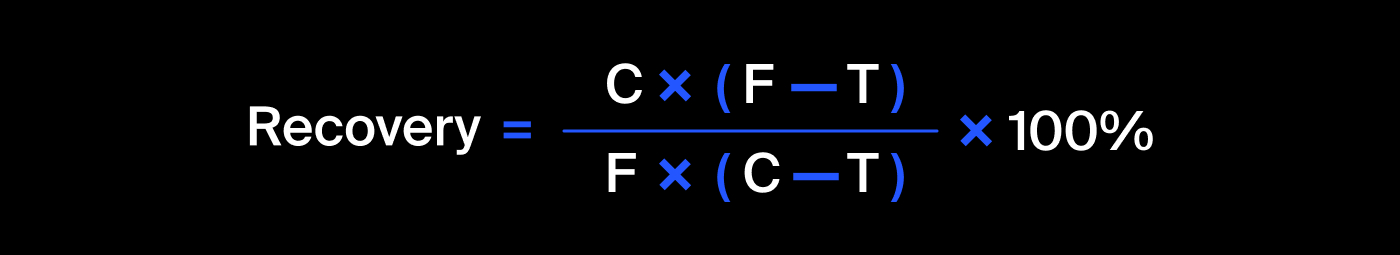

In [12]:
df_train['rougher.output.recovery.exam'] = df_train.apply(eff_rec, axis = 1)

In [13]:
rez = mean_absolute_error(df_train['rougher.output.recovery.exam'], df_train['rougher.output.recovery'])
print('Значение MAE между расчётами и значением признака от заказчика, в процентах:', rez)

Значение MAE между расчётами и значением признака от заказчика, в процентах: 1.1100347049376097e-14


Результаты расчета эффективности обогащения и данных приведенных в таблице от заказчика совпадают с высокой долей точности. Разницей для реальных инженерных расчетов можно пренебречь. 

### Анализ признаков, недоступные в тестовой выборке

In [14]:
lst_rez = list(set(df_full.columns)-set(df_test.columns))
lst_rez = sorted(lst_rez)
print(lst_rez)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

In [15]:
set(df_train.columns)-set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery.exam',
 'rougher.output.tail_ag',
 'rougher.out

In [16]:
(set(df_full.columns)-set(df_test.columns))-(set(df_train.columns)-set(df_test.columns))

set()

In [17]:
set(df_full.columns)-set(df_train.columns)

set()

In [18]:
print('Объем исходной выборки:                                        ',df_full.shape)
print('Объем обучающей выборки(добавили столбец с проверкой расчетов):',df_train.shape)
print('Объем тестовой выборки:                                        ',df_test.shape)
print('Объем тестовой и обучающей выборки:                            ', df_test.shape[0] + df_train.shape[0] )
print('Отношение тестовой выборки к полному объему выборок:           ', round(100*df_test.shape[0]/(df_train.shape[0]+df_test.shape[0]),1), '%')

Объем исходной выборки:                                         (19439, 87)
Объем обучающей выборки(добавили столбец с проверкой расчетов): (14149, 88)
Объем тестовой выборки:                                         (5290, 53)
Объем тестовой и обучающей выборки:                             19439
Отношение тестовой выборки к полному объему выборок:            27.2 %


Первичный анализ данных:
- в исходных данных и обучаеющей выборке есть одни и теже колонки;
- в тестовой выборке и в обучающей выборке, а также в тестовой и исходной выборке не хватает одних и тех же колонок;
- недостающие колонки это C — доля золота в концентрате после флотации/очистки;T — доля золота в отвальных хвостах после флотации/очистки - данные для расчета метрик эффективности технологических этапов , а также  'final.output.recovery' (эффективность обогащения финального концентрата) и 'rougher.output.recovery' (эффективность обогащения чернового концентрата) - целевые показатели машинного обучения;
- данные были разбиты заказчиком на тестовую и обучающую выборки в соотношении примерно 1 к 4, количество строк в тестовой + обучаеющей выборке совпадает с количеством строк в исходной выборке. 


In [19]:
lst_prm = ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level']

In [20]:
lst_rgh1 = ['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au']
lst_rgh2 = ['rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level']

In [21]:
lst_rez

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d9691a50>,
      dtype=object)

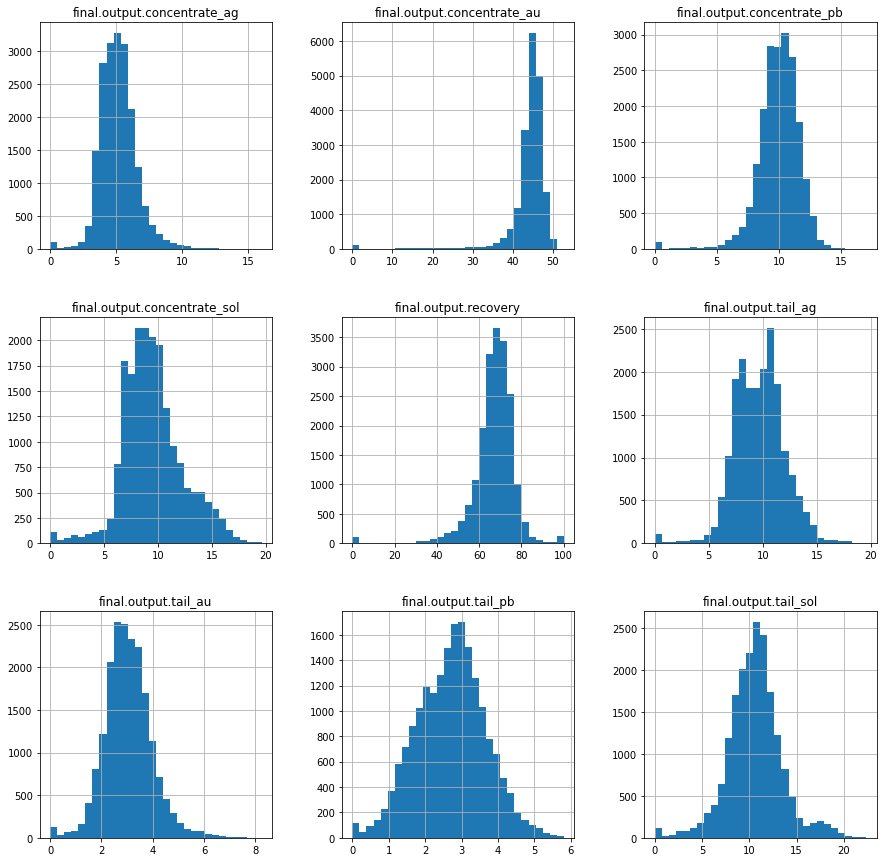

In [22]:
df_full[lst_rez[:9]].hist(bins=30, figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d8e24b50>,
      dtype=object)

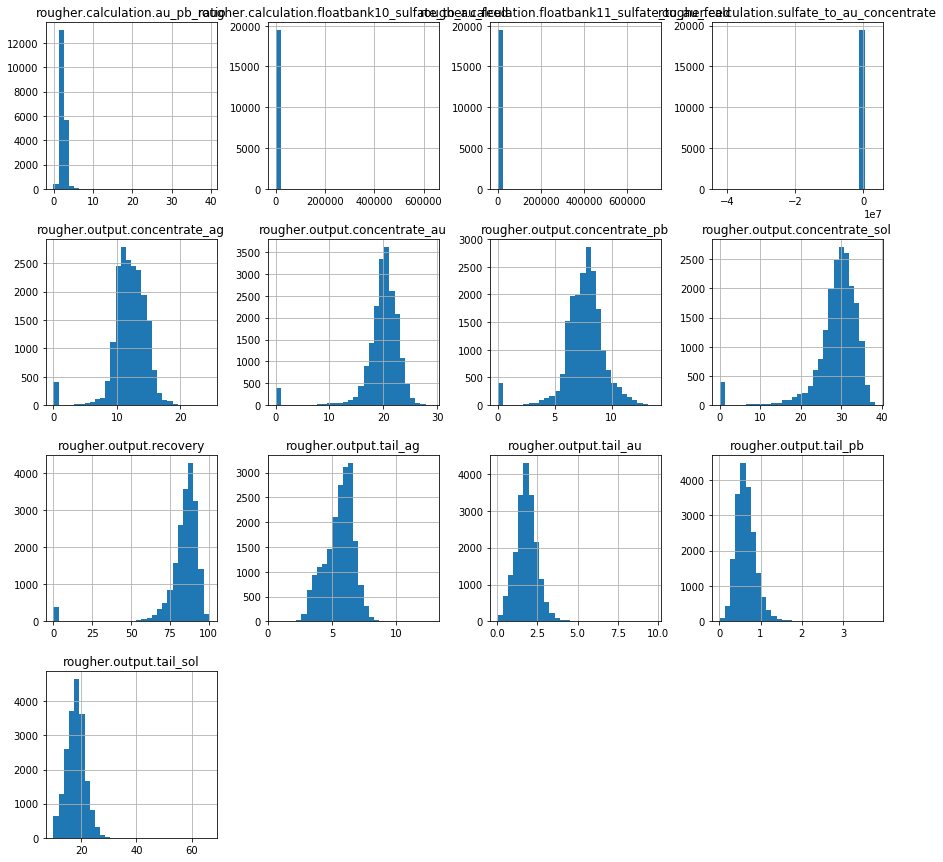

In [23]:
df_full[lst_rez[17:30]].hist(bins=30, figsize=(15,15))

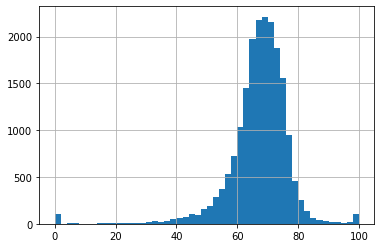

In [24]:
df_full['final.output.recovery'].hist(bins= 50)

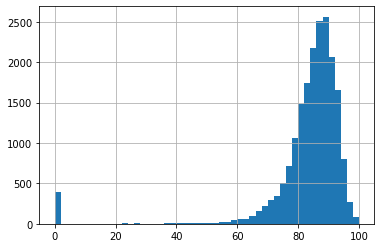

In [25]:
df_full['rougher.output.recovery'].hist(bins= 50)

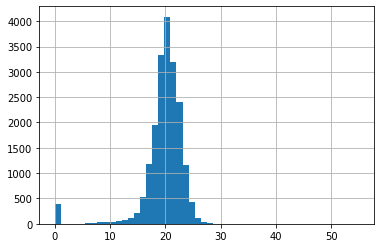

In [26]:
df_full['rougher.output.concentrate_au'].hist(bins= 50,range=(0,55))

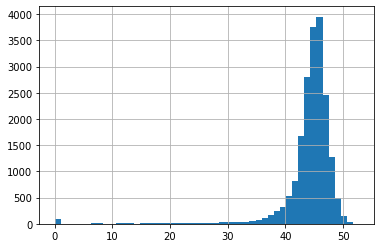

In [27]:
df_full['final.output.concentrate_au'].hist(bins= 50)

Оценка корреляции параметров 

In [28]:
df_full.corr().iloc[[4, 47]]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.recovery,0.185952,0.151987,0.265993,0.288568,1.000000,0.125986,-0.143094,-0.05028,-0.409200,0.366954,...,0.167059,0.031317,0.158557,-0.049973,0.067014,0.011871,0.052017,0.016480,-0.025192,-0.005305
rougher.output.recovery,0.084148,0.039732,0.138046,0.077312,0.327059,0.187328,0.072424,-0.04084,-0.104604,0.279260,...,0.212177,0.022431,0.227642,-0.035304,0.144985,0.013803,0.144236,0.035153,0.008058,-0.012089


In [29]:
df_corr = df_full.corr().iloc[[4, 47]].T
df_corr[df_corr['final.output.recovery']>0.5]['final.output.recovery'].to_frame()

,final.output.recovery
final.output.recovery,1.0


In [30]:
df_corr[df_corr['rougher.output.recovery']>0.5]['rougher.output.recovery'].to_frame()

,rougher.output.recovery
rougher.output.concentrate_ag,0.661330
rougher.output.concentrate_pb,0.552622
rougher.output.concentrate_sol,0.604420
rougher.output.concentrate_au,0.579638
rougher.output.recovery,1.000000


Посчитатали корреляцию для эффективности обогащения для флотации руды и для финального концентрата. Для финального концентрата значимой корреляции не выявлено. Для флотации руды выявлены значимые корреляции со следующими параметрами: концетрация серебра после флатации, концентрация свинца после флотации, концентрация золей(sol) после флотации и концентрация золота после флотации. Последнее весьма ожидаемо. 

### Предобработка данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d7b66650>,
      dtype=object)

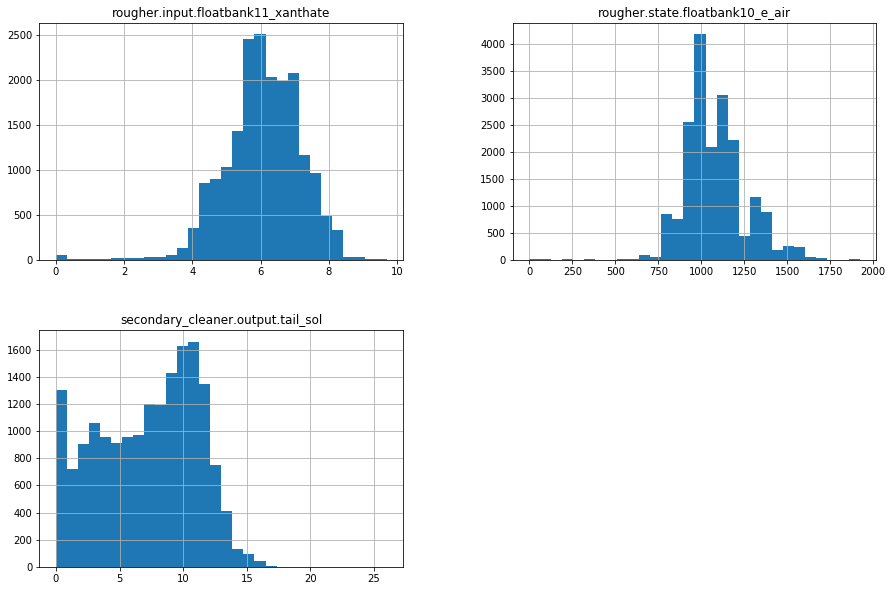

In [31]:
df_full[['secondary_cleaner.output.tail_sol',\
         'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_e_air']].hist(bins = 30, figsize = (15,10))


In [32]:
df_full[['secondary_cleaner.output.tail_sol',\
         'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_e_air']].mean()

secondary_cleaner.output.tail_sol        7.167247
rougher.input.floatbank11_xanthate       6.065533
rougher.state.floatbank10_e_air       1080.869685
dtype: float64

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [33]:
au_concentrate_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag_concentrate_columns = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_concentrate_columns = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

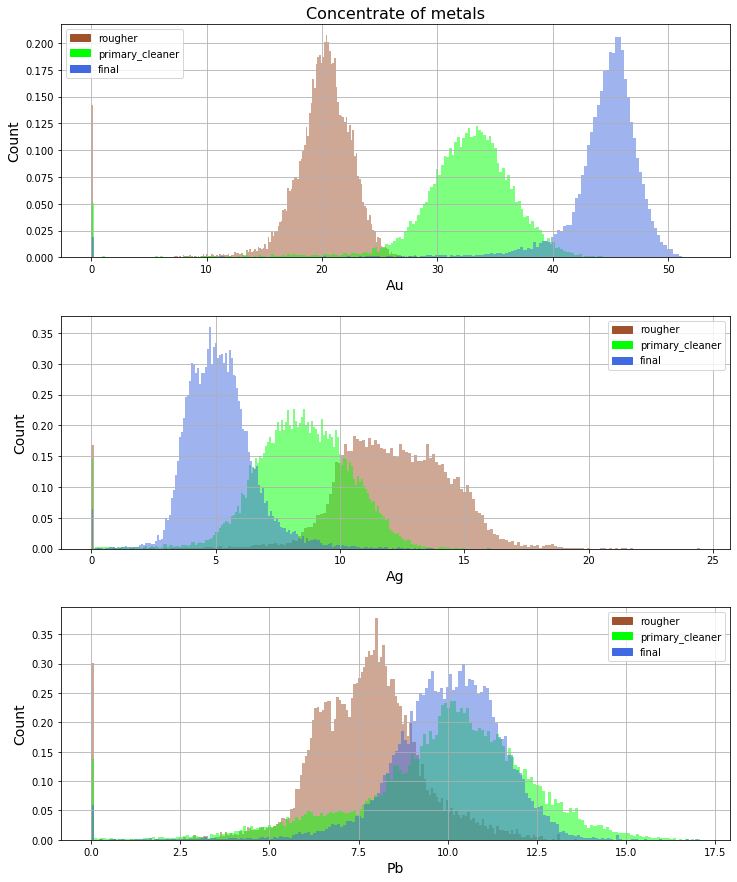

In [34]:
ALPHA = 0.5
BINS  = 200
COLORS = ['sienna', 'lime', 'royalblue']

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(12, 15)
ax[0].set_title(f"Concentrate of metals", fontsize=16)

patches = []
for clmn, color in zip(au_concentrate_columns, COLORS):
    ax[0].hist(df_full[clmn], density=True, color=color, bins=BINS, alpha=ALPHA)
    patches.append(mpatches.Patch(color=color, label=clmn.split('.')[0]))
ax[0].grid(True)
ax[0].set_xlabel(f"Au", fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].legend(handles=patches, loc='upper left')

for clmn, color in zip(ag_concentrate_columns, COLORS):
    ax[1].hist(df_full[clmn], density=True, color=color, bins=BINS, alpha=ALPHA)
ax[1].grid(True)
ax[1].set_xlabel(f"Ag", fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].legend(handles=patches, loc='upper right')

for clmn, color in zip(pb_concentrate_columns, COLORS):
    ax[2].hist(df_full[clmn], density=True, color=color, bins=BINS, alpha=ALPHA)
ax[2].grid(True)
ax[2].set_xlabel(f"Pb", fontsize=14)
ax[2].set_ylabel('Count', fontsize=14)
ax[2].legend(handles=patches, loc='upper right')

plt.subplots_adjust(hspace=0.25)
plt.show()

In [35]:
df_full[au_concentrate_columns].describe()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000
mean,19.772000,32.119400,44.076513
std,3.753600,5.627611,5.129784
min,0.000000,0.000000,0.000000
25%,18.802523,30.463140,43.402215
50%,20.280214,32.841295,45.011244
75%,21.717843,35.048006,46.275313
max,28.824507,45.933934,52.756638


In [36]:
df_full[ag_concentrate_columns].describe()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19438.000000
mean,11.994759,8.442408,5.168470
std,2.733862,2.054465,1.372348
min,0.000000,0.000000,0.000000
25%,10.628337,7.263288,4.251240
50%,12.098115,8.507298,5.066094
75%,13.736996,9.809001,5.895527
max,24.480271,16.081632,16.001945


In [37]:
df_full[pb_concentrate_columns].describe()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19323.000000,19438.000000
mean,7.606272,9.829530,9.978895
std,1.796757,2.556843,1.669240
min,0.000000,0.000000,0.000000
25%,6.725987,8.702328,9.137262
50%,7.742580,10.152433,10.102433
75%,8.565199,11.424971,11.035769
max,13.617072,17.081278,17.031899


Из анализа графиков и статистик можно сделать следующие выводы:
- Доля золота на каждом этапе увеличивается, что отвечает цели пройзводства по извлечению золота;
- Доля серебра снижается в ходе технологического процесса;
- Доля свинца после флотации возрастает, а на последующих этапах не изменяется. 

### Анализ распределения размеров гранул сырья на обучающей и тестовой выборках

In [38]:
feed_sizes = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

In [39]:
d = pd.concat([df_train[feed_sizes].describe(), df_test[feed_sizes].describe()], axis=1)
d.columns = ['train_rougher.input.feed_size', 'train_primary_cleaner.input.feed_size',
       'test_rougher.input.feed_size', 'test_primary_cleaner.input.feed_size']

d[['train_rougher.input.feed_size','test_rougher.input.feed_size','train_primary_cleaner.input.feed_size','test_primary_cleaner.input.feed_size']]

,train_rougher.input.feed_size,test_rougher.input.feed_size,train_primary_cleaner.input.feed_size,test_primary_cleaner.input.feed_size
count,14005.000000,5289.000000,14149.000000,5290.000000
mean,60.110518,55.951097,7.322310,7.266339
std,22.418485,19.081758,0.614062,0.610219
min,9.659576,0.046369,1.080000,5.650000
25%,48.973027,43.906347,6.960000,6.890000
50%,55.373885,50.841029,7.290000,7.250000
75%,66.080172,62.431047,7.700000,7.600000
max,484.967466,392.494040,10.470000,15.500000


In [40]:
type(df_test[feed_sizes].describe())

pandas.core.frame.DataFrame

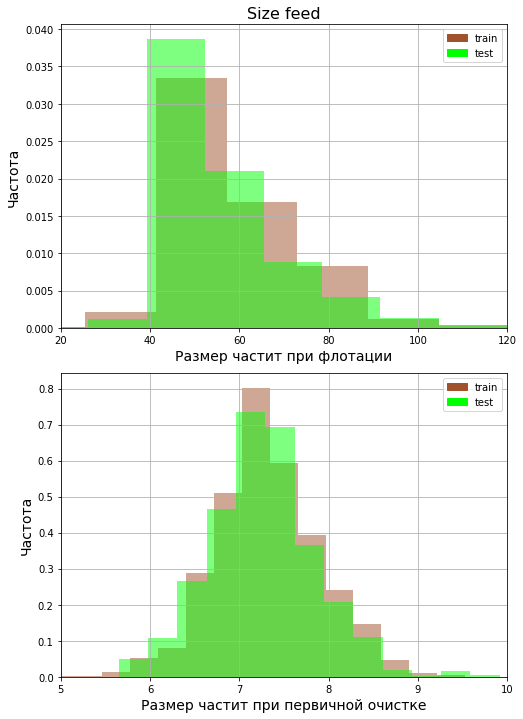

In [41]:
ALPHA = 0.5
BINS  = 30
COLORS = ['sienna', 'lime']

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(8, 12)
ax[0].set_title(f"Size feed", fontsize=16)
ax[0].set(xlim = (20,120))
ax[0].hist(df_train['rougher.input.feed_size'], density=True, color='sienna', bins=BINS, alpha=ALPHA)
ax[0].hist(df_test['rougher.input.feed_size'], density=True, color='lime', bins=BINS, alpha=ALPHA)
ax[0].grid(True)
ax[0].set_xlabel(f"Размер частит при флотации", fontsize=14)
ax[0].set_ylabel('Частота', fontsize=14)

patches = []
patches.append(mpatches.Patch(color='sienna', label='train'))
patches.append(mpatches.Patch(color='lime', label='test'))
ax[0].legend(handles=patches, loc='upper right')

ax[1].hist(df_train['primary_cleaner.input.feed_size'], density=True, color='sienna', bins=BINS, alpha=ALPHA)
ax[1].hist(df_test['primary_cleaner.input.feed_size'], density=True, color='lime', bins=BINS, alpha=ALPHA)
ax[1].set(xlim = (5,10))
ax[1].grid(True)
ax[1].set_xlabel(f"Размер частит при первичной очистке", fontsize=14)
ax[1].set_ylabel('Частота', fontsize=14)
ax[1].legend(handles=patches, loc='upper right')
plt.subplots_adjust(hspace=0.15)
plt.show()

In [42]:
ttest_rel(df_train['rougher.input.feed_size'].sample(5200, random_state =RND), \
          df_test['rougher.input.feed_size'].sample(5200, random_state =RND), nan_policy='omit')

Ttest_relResult(statistic=10.531235227632523, pvalue=1.1303427248199019e-25)

In [43]:
df_train.sample(5200, random_state =RND)['rougher.input.feed_size'].mean()/df_test.sample(5290, random_state =RND)['rougher.input.feed_size'].mean()

1.0797900340573945

In [44]:
ttest_rel(df_train.sample(5200, random_state =RND)['primary_cleaner.input.feed_size'], \
          df_test.sample(5200, random_state =RND)['primary_cleaner.input.feed_size'], nan_policy='omit')

Ttest_relResult(statistic=4.513346446885306, pvalue=6.522049773195868e-06)

In [45]:
(
    df_train.sample(5200, random_state =RND)['primary_cleaner.input.feed_size'].mean()/
 df_test.sample(5200, random_state =RND)['primary_cleaner.input.feed_size'].mean()
)

1.0073828609860411

In [46]:
ttest_rel(df_train.sample(50, random_state =12)['primary_cleaner.input.feed_size'], \
          df_train.sample(50, random_state =RND)['primary_cleaner.input.feed_size'], nan_policy='omit')

Ttest_relResult(statistic=-0.2722427665169175, pvalue=0.7865792856144631)

## Модель

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке